In [ ]:
import cv2
import torch
import numpy as np
from PIL import Image
from utils import display_images


DEVICE = 'cuda:2'
img_pil = Image.open('data/img5001_BDorig.png').convert('RGB')
display_images([img_pil])

## img2img stable-diffusion-v15
- https://huggingface.co/docs/diffusers/en/using-diffusers/img2img#stable-diffusion-v15

# Step 1: simple img2img

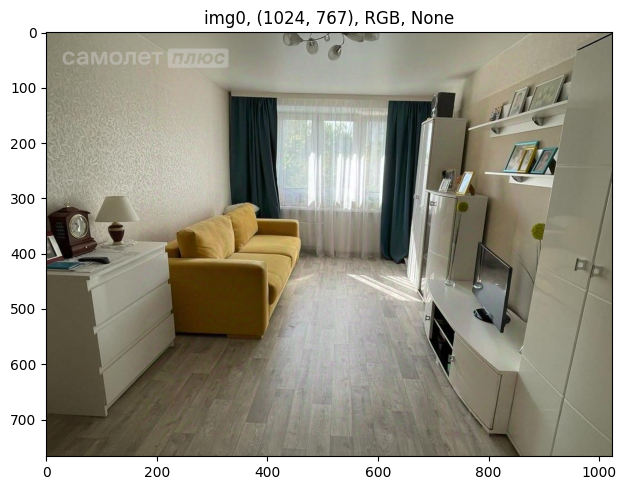

In [2]:
import cv2
import torch
import numpy as np
from PIL import Image
from utils import display_images


DEVICE = 'cuda:2'
img_pil = Image.open('data/img5001_BDorig.png').convert('RGB')
display_images([img_pil])

## img2img stable-diffusion-v15
- https://huggingface.co/docs/diffusers/en/using-diffusers/img2img#stable-diffusion-v15

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.5.1+cu121 with CUDA 1201 (you have 2.4.1+cu121)
    Python  3.11.11 (you have 3.11.10)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/model.fp16.safetensors:   0%|          | 0.00/608M [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/1.72G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

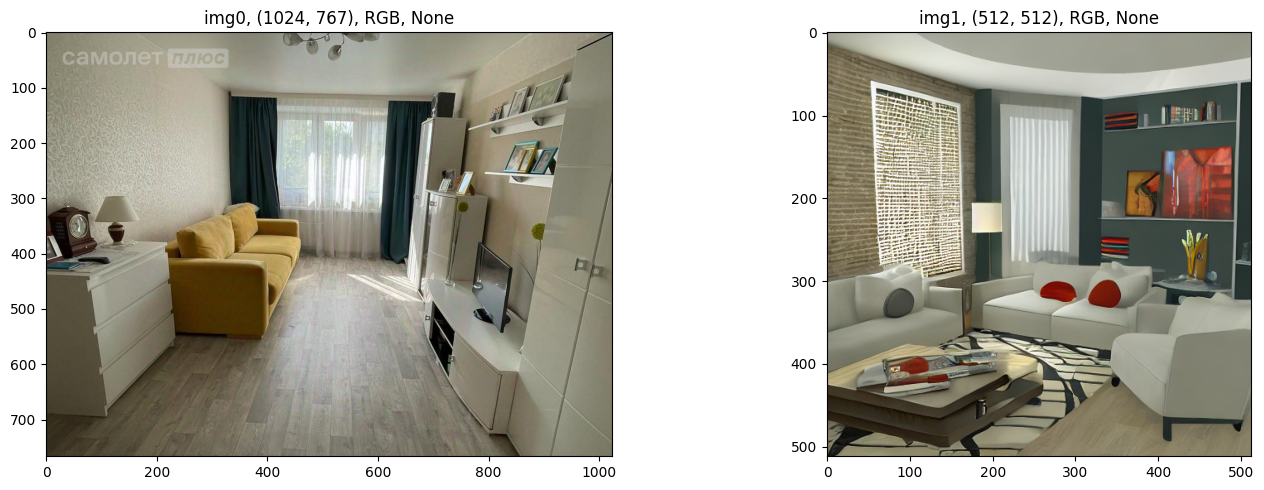

CPU times: user 27.2 s, sys: 13.9 s, total: 41.1 s
Wall time: 1min 32s


In [6]:
%%time

from diffusers import AutoPipelineForImage2Image

pipe = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5", 
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to(DEVICE)

prompt = "New modern style of livingroom, warm color palette, detailed, 8k"
img_gen = pipe(prompt, image=img_pil.resize((512, 512)), strenght=0.7, num_inference_steps=100)
display_images([img_pil] + img_gen.images)

## img2img stable-diffusion-xl-sdxl
- https://huggingface.co/docs/diffusers/en/using-diffusers/img2img#stable-diffusion-xl-sdxl

In [4]:
%%time

from diffusers import AutoPipelineForImage2Image

pipe = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", 
    torch_dtype=torch.float16,
    variant="fp16",
    use_safetensors=True
).to(DEVICE)

prompt = "New modern style of livingroom, warm color palette, detailed, 8k"

img_gen = pipe(prompt, image=img_pil, strength=0.7, num_inference_steps=100)
display_images([img_pil] + img_gen.images)

RuntimeError: Failed to import diffusers.pipelines.auto_pipeline because of the following error (look up to see its traceback):
Failed to import diffusers.pipelines.cogview4.pipeline_cogview4_control because of the following error (look up to see its traceback):
cannot import name 'GlmModel' from 'transformers' (/mnt/ssd/a-lugovoi/anaconda3/envs/py311/lib/python3.11/site-packages/transformers/__init__.py)

## StableDiffusionXLControlNetImg2ImgPipeline

- https://huggingface.co/docs/diffusers/api/pipelines/controlnet_sdxl#diffusers.StableDiffusionXLControlNetImg2ImgPipeline

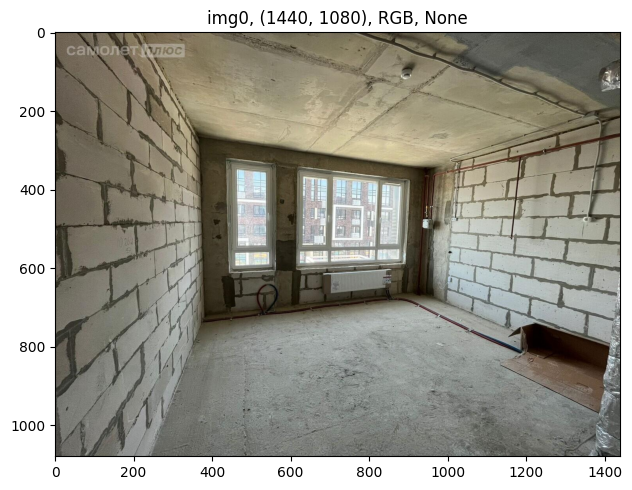

In [3]:
img_pil = Image.open('data/img5003_PrimaryHouse.jpg').convert('RGB')
display_images([img_pil])

2024-05-20 09:09:05.495520: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-20 09:09:05.498666: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-20 09:09:05.559099: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 09:09:06.523882: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


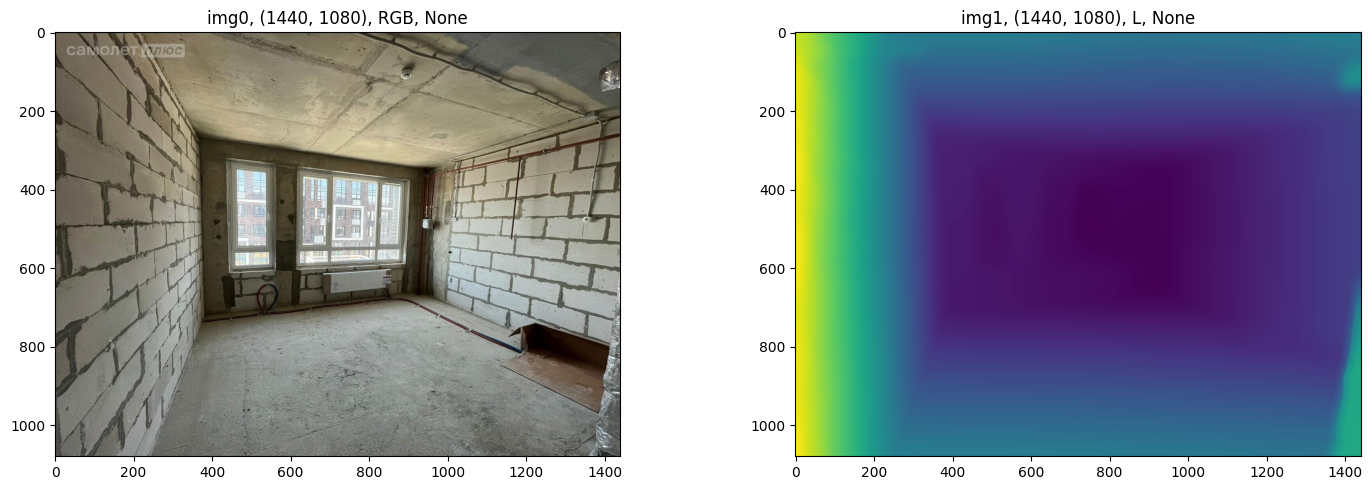

CPU times: user 1min 57s, sys: 33 s, total: 2min 30s
Wall time: 9.3 s


In [4]:
%%time

from transformers import DPTImageProcessor, DPTForDepthEstimation
from diffusers import ControlNetModel, StableDiffusionXLControlNetImg2ImgPipeline


processor = DPTImageProcessor.from_pretrained("Intel/dpt-beit-large-512", cache_dir=CACHE_DIR)
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-beit-large-512", cache_dir=CACHE_DIR)#.to(DEVICE)

# prepare image for the model
inputs = processor(images=img_pil, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=img_pil.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")

formatted = cv2.bilateralFilter(formatted, 50, 90, 90)

img_depth = Image.fromarray(formatted)
display_images([img_pil, img_depth])

In [5]:
%%time

controlnet = ControlNetModel.from_pretrained(
    'diffusers/controlnet-depth-sdxl-1.0-small',
    variant="fp16",
    use_safetensors=True,
    torch_dtype=torch.float16,
    cache_dir=CACHE_DIR
).to(DEVICE)

pipe = StableDiffusionXLControlNetImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    controlnet=controlnet,
    variant="fp16",
    use_safetensors=True,
    torch_dtype=torch.float16,
    cache_dir=CACHE_DIR
).to(DEVICE)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

CPU times: user 2.23 s, sys: 851 ms, total: 3.08 s
Wall time: 3.67 s


In [11]:
import yaml
from pprint import pprint 
with open('/home/a.lugovoi/Git/rnd-tasks/generative-ai/notebooks/style/style_prompts.yml', 'r', encoding='utf-8') as file:
    STYLE_PROMPTS = yaml.safe_load(file)

In [13]:
style = 'STYLE_1'
room = 'livingroom'

PROMPT = 'livingroom, ' + STYLE_PROMPTS[style]['prompt'] + STYLE_PROMPTS['QUALITY']['prompt']
NEGATIVE_PROMPT = STYLE_PROMPTS[style]['negative_prompt'] + STYLE_PROMPTS['QUALITY']['negative_prompt']

print(len(PROMPT.split()))
pprint(PROMPT)
print(len(NEGATIVE_PROMPT.split()))
pprint(NEGATIVE_PROMPT)

39
('livingroom, Modern Interior Style, Clear lines and shapes, Mixed lighting, '
 'Functionality with high-quality finish, Minimalism using modern materials, '
 'Neutral color palette with matte surfaces, Open spaces with technological '
 'featuresdenoise, true-to-life textures, photorealistic, hyperrealistic, '
 'highly detailed, high definition, 8k resolution')
34
('Enclosed, isolated spaces, Classic furniture with heavy textiles and '
 'excessive decoration, Decorative wall patterns, moldings, cornices, '
 'Traditional materials, Bright, contrasting colors and patternslow quality, '
 'sketch, cartoon, deformed, distortions, messy, exaggerated proportions, '
 'blurry, unfocused, surreal')


  0%|          | 0/135 [00:00<?, ?it/s]

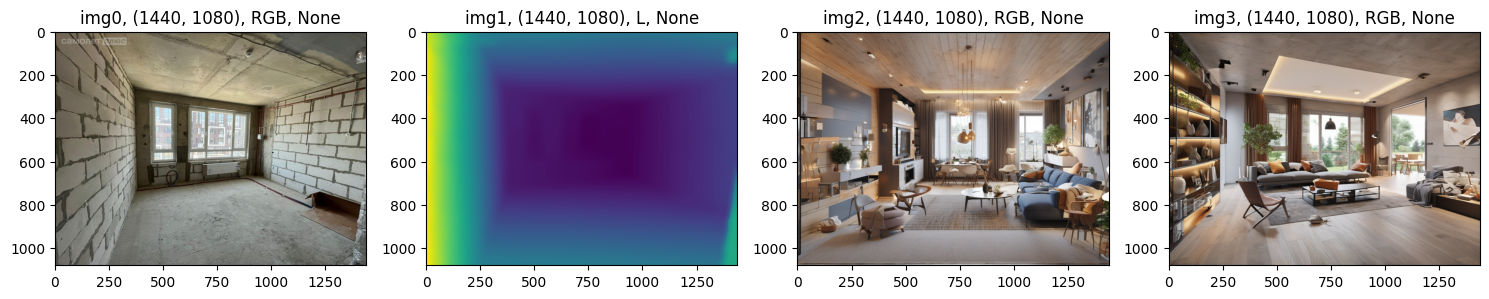

CPU times: user 1min 16s, sys: 21.1 s, total: 1min 37s
Wall time: 1min 35s


In [19]:
%%time

prompt = ["New modern style of livingroom, warm color palette, detailed, 8k"]
negative_prompt = ["low quality, bad quality, sketches"]

img_gen = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=img_pil,
    control_image=img_depth,
    strength=0.9,
    eta=0.0,
    num_inference_steps=150,
    controlnet_conditioning_scale=0.4,
    guidance_scale=12,
    num_images_per_prompt=2,
    generator = torch.Generator(DEVICE).manual_seed(23)
)

display_images([img_pil, img_depth] + img_gen.images)

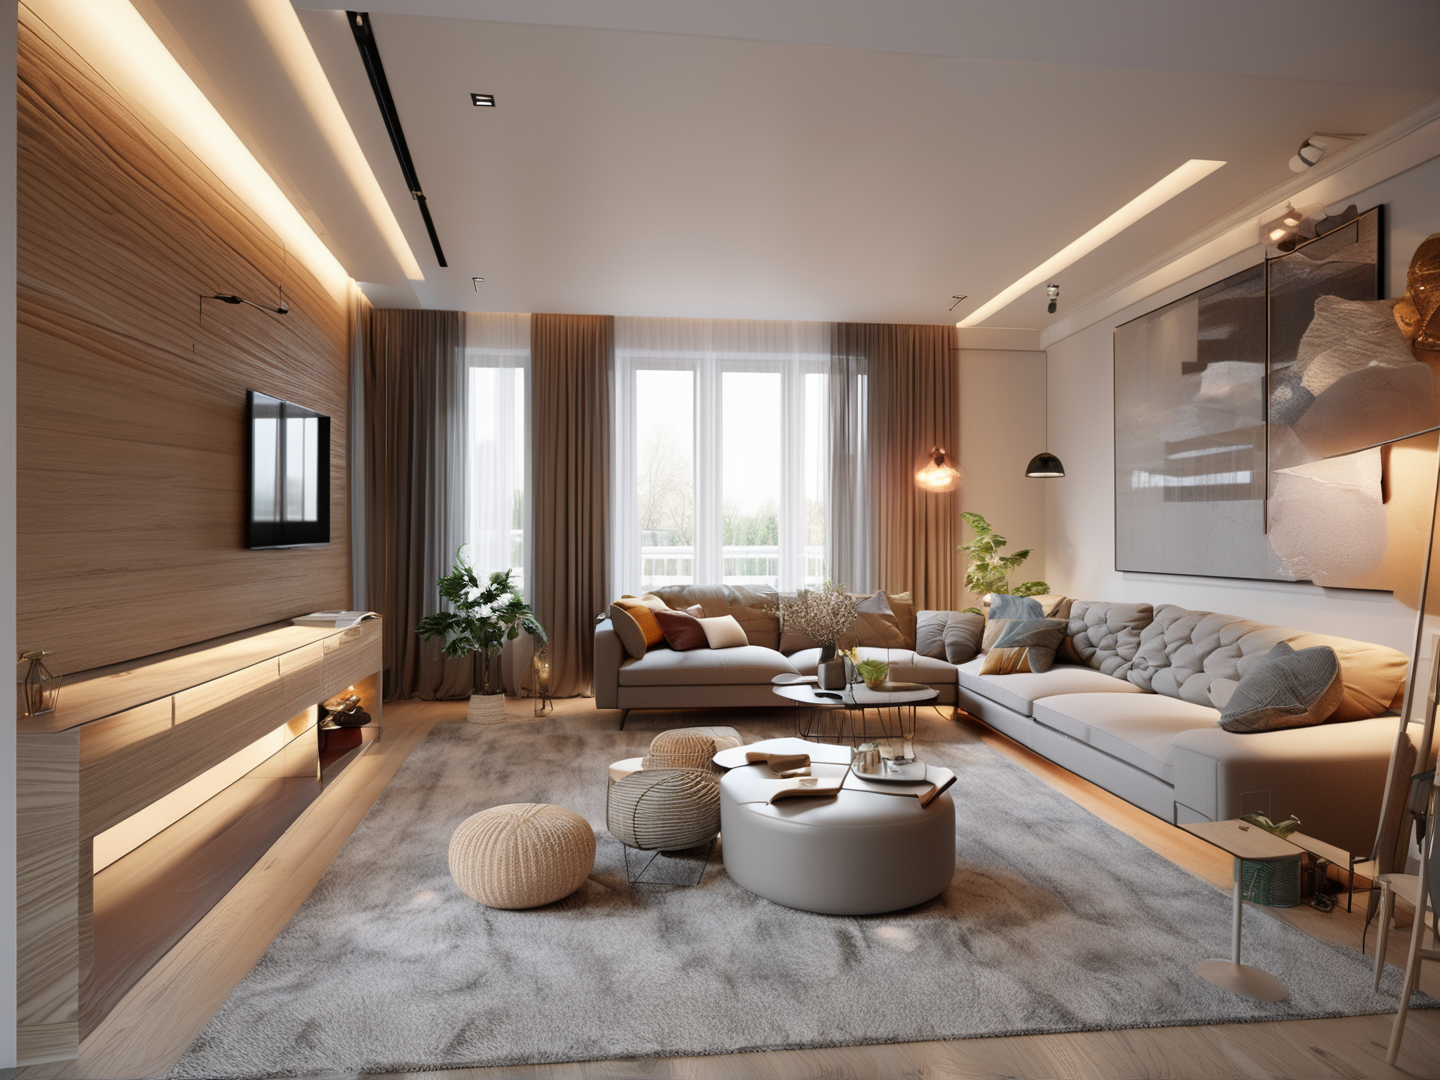

In [15]:
img_gen.images[0]